In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seml
import pandas as pd
import json
from collections import defaultdict, Counter
from functools import reduce
import seaborn as sns
from scipy.stats import binned_statistic
from matplotlib.lines import Line2D

In [2]:
%cd ..

/nfs/homedirs/fuchsgru/MastersThesis


In [3]:
import data.constants as dc
import model.constants as mc

In [4]:
collection_name = 'week25_backbones'
collection = seml.database.get_collection(collection_name)

In [5]:
by_status = defaultdict(set)
for r in collection.find():
    by_status[r['status']].add(r['config']['data']['dataset'])

In [6]:
by_status

defaultdict(set, {'COMPLETED': {'cora_full'}})

In [7]:
collection_name = 'week25_backbones'
collection = seml.database.get_collection(collection_name)
experiments = [{'config' : r['config'], 'result' : r['result'], 'id' : r['_id']} for r in collection.find() if r['status'] in ('COMPLETED',)]
for ex in experiments:
    # print(ex['result'].keys())
    ex['metrics'] = ex['result']['results']

In [8]:
# experiments_killed = [r for r in collection.find() if r['status'] in ('KILLED',)]

In [9]:
# experiments_failed = [r for r in collection.find() if r['status'] in ('FAILED',)]
# [ex['fail_trace'] for ex in experiments_failed]
# set(e['config']['data']['dataset'] for e in experiments_killed)

In [10]:
keys = set()
for ex in experiments:
    keys |= set(ex['metrics'].keys())

list(keys)

['misclassification_aucpr_gpc-eye-mode:weighted-relative:False:no_loc_fit-95conf_test',
 'misclassification_auroc_gpc-full-mode:weighted-relative:True:no_ber_fit-mask-no-edges_val',
 'ood_auroc_gpc-eye-mode:weighted-relative:False:no_ber_fit-95conf_test',
 'accuracy_id_ood-val_loc-no-edges_val',
 'ood_aucpr_gpc-iso-mode:max-relative:True:no_normal_fit-mask-no-edges_test',
 'misclassification_auroc_gpc-full-mode:weighted-relative:False:no_loc_fit-95conf-no-edges_val',
 'ood_auroc_gpc-full-mode:weighted-relative:True:no_loc_fit-95conf_test',
 'ood_aucpr_gpc-diag-mode:weighted-relative:True:no_loc_fit-mask-no-edges_val',
 'misclassification_auroc_feature-distance_normal_fit-mask-no-edges_val',
 'misclassification_aucpr_gpc-full-mode:max-relative:True:no_ber_fit-95conf_test',
 'misclassification_auroc_gpc-iso-mode:max-relative:False:no_ber_fit-95conf-no-edges_val',
 'ood_auroc_gpc-eye-mode:max-relative:True:no_ber_fit-mask_test',
 'misclassification_auroc_gpc-iso-mode:weighted-relative:Tru

In [11]:
model_types = set()
for ex in experiments:
    model_types.add(ex['config']['model']['model_type'])
model_types

{'appnp', 'gat', 'gcn', 'gcn_linear_classification', 'mlp'}

In [12]:
METRIC = 'Metric'
AUROC = 'AUC-ROC'
AUCPR = 'AUC-PR'

SETTING = 'Setting'
HYBRID = 'Inductive'
TRANSDUCTIVE = 'Transductive'
LOC = 'Leave Out Classes'
NORMAL = 'Normal'
BERNOULLI = 'Bernoulli'
NO_EDGES = 'No Edges'
PROXY = 'Proxy'
EXPERIMENT = 'Experiment'
DATASET = 'Dataset'
PERTURBATION = 'Perturbations'

RESIDUAL = 'Residual'
SPECTRAL_NORM = 'Spectral Norm'
RECONSTRUCTION = 'Edge Reco.'
SPECTRAL_OUTPUT_NORM = 'Spectral Norm on Last Layer'
WEIGHT_SCALE = 'Weight Scale'
LOWER_LIPSCHITZ = 'Empirical Lower\nLipschitz Bound'
UPPER_LIPSCHITZ = 'Empirical Upper\nLipschitz Bound'

OOD_TYPE = 'O.O.D. Type'

EPISTEMIC = 'Epistemic'
ALEATORIC = 'Aleatoric'

ACCURACY = 'Accuracy'
# ECE = 'Expected Calibration Error'
ECE = 'ECE'

MODEL_TYPE = 'Model'

APPNP = 'APPNP'
GAT = 'GAT'
GCN = 'GCN'
GCN_LINEAR_CLASSIFICATION = 'GCN + Linear'
MLP = 'MLP'


In [13]:
mode = 'test'

In [14]:
ex['config']['model']

{'activation': 'leaky_relu',
 'hidden_sizes': [64],
 'leaky_relu_slope': 0.01,
 'model_type': 'mlp',
 'reconstruction': {'loss_weight': 1.0, 'reconstruction_type': 'energy'},
 'residual': True,
 'use_bias': True,
 'use_spectral_norm': True,
 'weight_scale': 200.0}

In [15]:
[k for k in ex['metrics'].keys() if 'no-edges' in k and 'auroc' in k]

['ood_auroc_total-predictive-entropy_ber-no-edges_val',
 'misclassification_auroc_total-predictive-entropy_ber-no-edges_val',
 'ood_auroc_max-score_ber-no-edges_val',
 'misclassification_auroc_max-score_ber-no-edges_val',
 'ood_auroc_logit-energy_ber-no-edges_val',
 'misclassification_auroc_logit-energy_ber-no-edges_val',
 'ood_auroc_gpc-full-mode:weighted-relative:False:no_ber_fit-mask-no-edges_val',
 'misclassification_auroc_gpc-full-mode:weighted-relative:False:no_ber_fit-mask-no-edges_val',
 'ood_auroc_gpc-full-mode:weighted-relative:True:no_ber_fit-mask-no-edges_val',
 'misclassification_auroc_gpc-full-mode:weighted-relative:True:no_ber_fit-mask-no-edges_val',
 'ood_auroc_gpc-full-mode:max-relative:False:no_ber_fit-mask-no-edges_val',
 'misclassification_auroc_gpc-full-mode:max-relative:False:no_ber_fit-mask-no-edges_val',
 'ood_auroc_gpc-full-mode:max-relative:True:no_ber_fit-mask-no-edges_val',
 'misclassification_auroc_gpc-full-mode:max-relative:True:no_ber_fit-mask-no-edges_va

In [16]:
# epistemic_proxy = 'ood_gpc-diag-mode:weighted-relative:False:no_fit-95conf'
aleatoric_proxy = 'ood_max-score'
epistemic_proxy = 'ood_gpc-diag-mode:weighted-relative:False:no_fit-mask'
# metric = 'auroc'
# METRIC = 'AUC-ROC'
metric = 'auroc'
METRIC = 'AUC-ROC'

In [17]:
data_proxy, data_acc_ece = [], []

unrecognized = set()

for ex in experiments:
    cfg = ex['config']
    base = {
        SETTING : {dc.HYBRID : HYBRID, dc.TRANSDUCTIVE : TRANSDUCTIVE}[cfg['data']['setting']],
        OOD_TYPE : {dc.LEFT_OUT_CLASSES : LOC, dc.PERTURBATION : PERTURBATION}[cfg['data']['ood_type']],
        DATASET :  cfg['data']['dataset'],
        LOWER_LIPSCHITZ : ex['metrics'][f'empirical_lipschitz_{mode}_slope_min_perturbation_noise_{mode}'][0]['value'],
        UPPER_LIPSCHITZ : ex['metrics'][f'empirical_lipschitz_{mode}_slope_max_perturbation_noise_{mode}'][0]['value'],
        MODEL_TYPE : {
            mc.APPNP : APPNP,
            mc.GCN : GCN,
            mc.GCN_LINEAR_CLASSIFICATION : GCN_LINEAR_CLASSIFICATION,
            mc.GAT : GAT,
            mc.MLP : MLP,
        }[cfg['model']['model_type']],
        RECONSTRUCTION : cfg['model'].get('reconstruction', {}).get('loss_weight', 0) > 0,
        SPECTRAL_NORM : cfg['model'].get('use_spectral_norm', False),
    }
    data_acc_ece.append(base | {
        ACCURACY : ex['metrics'][f'accuracy_{mode}_{mode}'][0],
        ECE : ex['metrics'][f'ece_{mode}_{mode}'][0]['value'],
    })
    for k, vs in ex['metrics'].items():
        if metric in k and k.endswith('_' + mode):
            k = k.replace(metric + '_', '').replace('_' + mode, '')
            if '-no-edges' in k:
                no_edges = True
                k = k.replace('-no-edges', '')
            else:
                no_edges = False
                
            if '_loc' in k or '-loc' in k:
                exp = LOC
                k = k.replace('_loc', '').replace('-loc', '')
            elif '_ber' in k or '-ber' in k:
                exp = BERNOULLI
                k = k.replace('_ber', '').replace('-ber', '')
            elif '_normal' in k or '-normal' in k:
                exp = NORMAL
                k = k.replace('_normal', '').replace('-normal', '')
            else:
                raise ValueError(k)
            
            metric_cfg = {}
            
            if k == aleatoric_proxy:
                metric_cfg[PROXY] = ALEATORIC
            elif k == epistemic_proxy:
                metric_cfg[PROXY] = EPISTEMIC
            else:
                unrecognized.add(k)
                continue
            
            for v in vs:
                v = v['value']
                data_proxy.append({
                    METRIC : v,
                    NO_EDGES : no_edges,
                    EXPERIMENT : exp,
                } | metric_cfg | base | {
                    ACCURACY : ex['metrics'][f'accuracy_{mode}_{mode}'][0],
                    ECE : ex['metrics'][f'ece_{mode}_{mode}'][0]['value'],
                }
                )
                

In [18]:
df_proxy = pd.DataFrame(data_proxy)
df_acc_ece = pd.DataFrame(data_acc_ece)

In [19]:
df_proxy[
    (df_proxy[EXPERIMENT] == LOC) &
    (df_proxy[NO_EDGES] == False) &
    (df_proxy[SETTING] == HYBRID) &
    (df_proxy[PROXY] == EPISTEMIC) 
]

,AUC-ROC,No Edges,Experiment,Proxy,Setting,O.O.D. Type,Dataset,Empirical Lower\nLipschitz Bound,Empirical Upper\nLipschitz Bound,Model,Edge Reco.,Spectral Norm,Accuracy,ECE
39,0.669203,False,Leave Out Classes,Epistemic,Inductive,Leave Out Classes,cora_full,0.032417,1.426941,APPNP,False,False,0.852632,0.089472
43,0.525878,False,Leave Out Classes,Epistemic,Inductive,Leave Out Classes,cora_full,0.023703,2.106758,APPNP,False,False,0.847280,0.101355
47,0.600132,False,Leave Out Classes,Epistemic,Inductive,Leave Out Classes,cora_full,0.039775,1.665143,APPNP,False,False,0.813665,0.072470
51,0.668084,False,Leave Out Classes,Epistemic,Inductive,Leave Out Classes,cora_full,0.030442,1.474028,APPNP,False,False,0.852632,0.092298
55,0.619169,False,Leave Out Classes,Epistemic,Inductive,Leave Out Classes,cora_full,0.034550,1.759381,APPNP,False,False,0.861925,0.108429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,0.696861,False,Leave Out Classes,Epistemic,Inductive,Leave Out Classes,cora_full,0.868154,43.189793,MLP,True,True,0.709205,0.248887
1427,0.696339,False,Leave Out Classes,Epistemic,Inductive,Leave Out Classes,cora_full,0.972843,39.556314,MLP,True,True,0.759834,0.241508
1431,0.683598,False,Leave Out Classes,Epistemic,Inductive,Leave Out Classes,cora_full,0.953296,49.723118,MLP,True,True,0.783158,0.212449
1435,0.736306,False,Leave Out Classes,Epistemic,Inductive,Leave Out Classes,cora_full,0.950742,51.340161,MLP,True,True,0.719665,0.254534


In [20]:
np.unique(df_proxy[MODEL_TYPE])

array(['APPNP', 'GAT', 'GCN', 'GCN + Linear', 'MLP'], dtype=object)

In [21]:
def pareto_front(xs, ys):
    xs, ys = np.array(xs), np.array(ys)
    fx, fy = [], []
    for x, y in zip(xs, ys):
        if not ((xs > x) & (ys > y)).any():
            fx.append(x)
            fy.append(y)
    return np.array(fx), np.array(fy)

(<Figure size 432x252 with 8 Axes>,
 array([[<AxesSubplot:title={'center':'Leave Out Classes'}, ylabel='AUC-ROC'>,
         <AxesSubplot:title={'center':'Bernoulli'}>,
         <AxesSubplot:title={'center':'Normal'}>],
        [<AxesSubplot:xlabel='Accuracy', ylabel='AUC-ROC'>,
         <AxesSubplot:xlabel='Accuracy'>, <AxesSubplot:xlabel='Accuracy'>]],
       dtype=object))

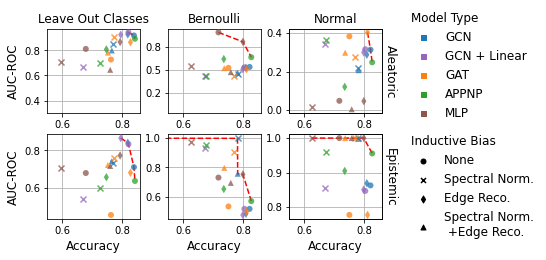

In [22]:
def pareto_plot(data, x_name, y_name, xlim=(0.55, 0.88)):
    
    fig, axs = plt.subplots(2, 3, figsize=(6, 3.5), gridspec_kw = {
            'wspace' : 0.3, 'hspace' : 0.25,
        'width_ratios' : [0.8] * 3,
    }, sharex=False, sharey=False)
    
    proxy_axs = axs[:, :3]
    data = data.copy()
    
    model_type_to_color = {
        GCN : 'tab:blue',
        GCN_LINEAR_CLASSIFICATION : 'tab:purple',
        GAT : 'tab:orange',
        APPNP : 'tab:green',
        MLP : 'tab:brown',
    }
    
    ws_and_reco_to_marker = {
        (False, False) : 'o',
        (True, False) : 'x',
        (False, True) : 'd',
        (True, True) : '^'
    }
    
    for col_idx, col in enumerate((LOC, BERNOULLI, NORMAL)):
        for row_idx, proxy in enumerate((ALEATORIC, EPISTEMIC)):
            ax = proxy_axs[row_idx, col_idx]
            
            if col_idx == (proxy_axs.shape[1] - 1):
                # Twin label
                tax = ax.twinx()
                tax.set_ylabel(proxy, fontsize=12, rotation=270, 
                               labelpad=15)
                tax.tick_params(axis='y', labelright=False, right=False)   
                
            if row_idx == 0:
                ax.set_title(col, fontsize=12)
            
            # For the pareto front, collect all xs and ys
            all_xs, all_ys = [], []
            for model_type, color in model_type_to_color.items():
                for (sn, reco), marker in ws_and_reco_to_marker.items():
                    data_rc = data[
                        (data[EXPERIMENT] == col)
                        & (data[PROXY] == proxy)
                        & (data[RECONSTRUCTION] == reco)
                        & (data[SPECTRAL_NORM] == sn)
                        & (data[MODEL_TYPE] == model_type)
                    ]
                    assert data_rc.shape[0] == 9
                    
                    x, y = data_rc[x_name].mean(), data_rc[y_name].mean()
                    sc = ax.scatter([x], [y], c=color, marker=marker, alpha=.75, zorder=4)
                    if marker != 'x':
                        sc.set_edgecolor('none')
                    all_xs.append(x)
                    all_ys.append(y)
            
            from matplotlib.ticker import FormatStrFormatter
            ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
            
            # Plot the pareto front
            xf, yf = pareto_front(all_xs, all_ys)
            ax.plot(xf[np.argsort(xf)], yf[np.argsort(xf)], c='red', ls='--')
            ax.set_xlim(*xlim)
            
            
    for ax in proxy_axs.flatten():
        ax.grid(which='major')
    for ax in proxy_axs[-1, :].flatten():
        ax.set_xlabel(x_name, fontsize=12)
    for ax in proxy_axs[:, 0].flatten():
        ax.set_ylabel(y_name, fontsize=12)
    
    handles = []
    labels = []
    for model_type, color in model_type_to_color.items():
        handles.append(axs[-1, -1].scatter([-1], [1], marker='s', c=color, s=25))
        labels.append(model_type)
        
    lleft = 0.06
    legend = fig.legend(handles, labels,
               bbox_to_anchor=(1.2 + lleft, .99), loc='upper right', frameon=False, fontsize=12, title='Model Type')
    plt.setp(legend.get_title(),fontsize=12)
    legend._legend_box.align = "left"
    
    
    handles = []
    labels = []
    for (sn, reco), marker in ws_and_reco_to_marker.items():
        handles.append(axs[-1, -1].scatter([-1], [1], marker=marker, c='black', s=25))
        labels.append({
            (False, False) : 'None',
            (True, False) : 'Spectral Norm.',
            (False, True) : 'Edge Reco.',
            (True, True) : 'Spectral Norm.\n +Edge Reco.'
        }[(sn, reco)])
        
    legend = fig.legend(handles, labels,
               bbox_to_anchor=(1.217 + lleft, 0.5), loc='upper right', frameon=False, fontsize=12, title='Inductive Bias')
    plt.setp(legend.get_title(),fontsize=12)
    legend._legend_box.align = "left"
    
    return fig, axs
    
    
pareto_plot(df_proxy[
    (df_proxy[NO_EDGES] == False) &
    (df_proxy[SETTING] == HYBRID)
], ACCURACY, METRIC, xlim=(.55, .86))




In [50]:
def formated_cmp(a, b, mode='ge', verbose=False):
    if verbose:
        print(float(f'{100 * a:.1f}'), float(f'{100 * b:.1f}'))
    if mode == 'ge':
        #
        return float(f'{100 * a:.1f}') >= float(f'{100 * b:.1f}')
    elif mode == 'le':
        return float(f'{100 * a:.1f}') <= float(f'{100 * b:.1f}')
    else:
        raise RuntimeError(mode)

In [43]:
def print_ood_metric_latex(df, metric):
    
    # Find the highest lowest bound to identify best models
    experiment_to_hlb = {}
    for experiment in ((LOC, BERNOULLI, NORMAL)):
        df_exp_grouped = df[(df[EXPERIMENT] == experiment)].groupby([MODEL_TYPE, PROXY, SPECTRAL_NORM, RECONSTRUCTION])
        experiment_to_hlb[experiment] = min(1.0, (df_exp_grouped[metric].mean()).max())
        
    #print(experiment_to_hlb)
    
    for model_type in (GCN, GCN_LINEAR_CLASSIFICATION, APPNP, GAT, MLP):
        for sn in (False, True):
            for reco in (False, True):
                
                df_model = df[(df[MODEL_TYPE] == model_type) & (df[SPECTRAL_NORM] == sn) & (df[RECONSTRUCTION] == reco)]
                
                line = ''
                if int(sn) + int(reco) == 0:
                    if model_type == GCN_LINEAR_CLASSIFICATION:
                        line += '\\multirow{3}{*}{' + '\\makecell[l]{GCN \\\\ + Linear}' + '} & '
                    else:
                        line += '\\multirow{3}{*}{' + model_type + '} & '
                else:
                    line += '& '
                bool_to_mark = {False : '\\xmark', True: '\\cmark'}
                line += ' & '.join(bool_to_mark[b] for b in (sn, reco))
                
                for experiment in ((LOC, BERNOULLI, NORMAL)):
                    for proxy in ((ALEATORIC, EPISTEMIC)):
                        df_vals = df_model[(df_model[EXPERIMENT] == experiment) & (df_model[PROXY] == proxy)]
                        mean, std = df_vals[metric].mean(), df_vals[metric].std()
                        if formated_cmp(mean, experiment_to_hlb[experiment], mode='ge'):
                            
                            line += ' & $\\bm{' + f'{mean * 100:.1f}' + '} \\pm \\bm{' + f'{std * 100:.1f}' + '}$'
                        else:
                            line += f' & ${mean * 100:.1f}' + ' \\pm ' + f'{std * 100:.1f}$'
                        
                    
                    
        
                print(line + ' \\\\')
        print('\\hline')
    

print_ood_metric_latex(
    df_proxy[
        (df_proxy[DATASET] == dc.CORA_FULL) 
        & (df_proxy[SETTING] == HYBRID) 
        & (df_proxy[NO_EDGES] == False)],
    METRIC,
)

\multirow{3}{*}{GCN} & \xmark & \xmark & $92.0 \pm 3.5$ & $71.0 \pm 4.8$ & $53.1 \pm 3.5$ & $51.8 \pm 5.0$ & $31.4 \pm 2.1$ & $86.3 \pm 1.5$ \\
& \xmark & \cmark & $92.9 \pm 2.7$ & $84.0 \pm 3.9$ & $52.2 \pm 2.5$ & $48.5 \pm 2.4$ & $28.8 \pm 3.4$ & $86.9 \pm 1.9$ \\
& \cmark & \xmark & $85.0 \pm 6.2$ & $73.2 \pm 6.0$ & $45.1 \pm 6.4$ & $99.5 \pm 0.6$ & $22.0 \pm 5.1$ & $\bm{100.0} \pm \bm{0.0}$ \\
& \cmark & \cmark & $79.9 \pm 4.9$ & $74.2 \pm 3.0$ & $46.8 \pm 5.3$ & $75.5 \pm 6.8$ & $20.7 \pm 3.7$ & $99.8 \pm 0.3$ \\
\hline
\multirow{3}{*}{\makecell[l]{GCN \\ + Linear}} & \xmark & \xmark & $\bm{94.4} \pm \bm{2.3}$ & $83.2 \pm 4.9$ & $52.7 \pm 2.9$ & $51.8 \pm 4.8$ & $31.6 \pm 5.6$ & $84.7 \pm 2.8$ \\
& \xmark & \cmark & $92.5 \pm 6.3$ & $86.5 \pm 2.0$ & $50.7 \pm 2.1$ & $47.7 \pm 2.5$ & $30.0 \pm 4.7$ & $85.1 \pm 2.6$ \\
& \cmark & \xmark & $66.5 \pm 8.5$ & $53.9 \pm 10.5$ & $43.0 \pm 6.8$ & $92.8 \pm 3.8$ & $34.3 \pm 2.3$ & $85.5 \pm 2.9$ \\
& \cmark & \cmark & $49.0 \pm 5.3$ & $62.9

In [53]:
def print_acc_ece_latex(df):
    
    # Find the highest lowest bound to identify best models
    df_exp_grouped = df.groupby([MODEL_TYPE, SPECTRAL_NORM, RECONSTRUCTION, OOD_TYPE])
    metric_to_hlb = {
        ACCURACY : min(1.0, (df_exp_grouped[ACCURACY].mean()).max()),
        ECE : max(0.0, (df_exp_grouped[ECE].mean()).min()),
    }
    
    for model_type in (GCN, GCN_LINEAR_CLASSIFICATION, APPNP, GAT, MLP):
        for sn in (False, True):
            for reco in (False, True):
                
                df_model = df[(df[MODEL_TYPE] == model_type) & (df[SPECTRAL_NORM] == sn) & (df[RECONSTRUCTION] == reco)]
                
                line = ''
                if int(sn) + int(reco) == 0:
                    if model_type == GCN_LINEAR_CLASSIFICATION:
                        line += '\\multirow{3}{*}{' + '\\makecell[l]{GCN \\\\ + Linear}' + '} & '
                    else:
                        line += '\\multirow{3}{*}{' + model_type + '} & '
                else:
                    line += '& '
                bool_to_mark = {False : '\\xmark', True: '\\cmark'}
                line += ' & '.join(bool_to_mark[b] for b in (sn, reco))
                
                for ood_type in ((LOC, PERTURBATION)):
                    df_vals = df_model[(df_model[OOD_TYPE] == ood_type)]
                    
                    for metric in ((ACCURACY, ECE)):
                        mean, std = df_vals[metric].mean(), df_vals[metric].std()
                        
                        if metric == ACCURACY:
                            is_best = formated_cmp(mean, metric_to_hlb[metric], mode='ge', verbose=False)
                        else:
                            is_best = formated_cmp(mean, metric_to_hlb[metric], mode='le')
                        
                        if is_best:

                            line += ' & $\\bm{' + f'{mean * 100:.1f}' + '} \\pm \\bm{' + f'{std * 100:.1f}' + '}$'
                        else:
                            line += f' & ${mean * 100:.1f}' + ' \\pm ' + f'{std * 100:.1f}$'

                    
                    
        
                print(line + ' \\\\')
        print('\\hline')


In [45]:

print_ood_metric_latex(
    df_proxy[
        (df_proxy[DATASET] == dc.CORA_FULL) 
        & (df_proxy[SETTING] == HYBRID) 
        & (df_proxy[NO_EDGES] == False)],
    METRIC,
)

\multirow{3}{*}{GCN} & \xmark & \xmark & $92.0 \pm 3.5$ & $71.0 \pm 4.8$ & $53.1 \pm 3.5$ & $51.8 \pm 5.0$ & $31.4 \pm 2.1$ & $86.3 \pm 1.5$ \\
& \xmark & \cmark & $92.9 \pm 2.7$ & $84.0 \pm 3.9$ & $52.2 \pm 2.5$ & $48.5 \pm 2.4$ & $28.8 \pm 3.4$ & $86.9 \pm 1.9$ \\
& \cmark & \xmark & $85.0 \pm 6.2$ & $73.2 \pm 6.0$ & $45.1 \pm 6.4$ & $99.5 \pm 0.6$ & $22.0 \pm 5.1$ & $\bm{100.0} \pm \bm{0.0}$ \\
& \cmark & \cmark & $79.9 \pm 4.9$ & $74.2 \pm 3.0$ & $46.8 \pm 5.3$ & $75.5 \pm 6.8$ & $20.7 \pm 3.7$ & $99.8 \pm 0.3$ \\
\hline
\multirow{3}{*}{\makecell[l]{GCN \\ + Linear}} & \xmark & \xmark & $\bm{94.4} \pm \bm{2.3}$ & $83.2 \pm 4.9$ & $52.7 \pm 2.9$ & $51.8 \pm 4.8$ & $31.6 \pm 5.6$ & $84.7 \pm 2.8$ \\
& \xmark & \cmark & $92.5 \pm 6.3$ & $86.5 \pm 2.0$ & $50.7 \pm 2.1$ & $47.7 \pm 2.5$ & $30.0 \pm 4.7$ & $85.1 \pm 2.6$ \\
& \cmark & \xmark & $66.5 \pm 8.5$ & $53.9 \pm 10.5$ & $43.0 \pm 6.8$ & $92.8 \pm 3.8$ & $34.3 \pm 2.3$ & $85.5 \pm 2.9$ \\
& \cmark & \cmark & $49.0 \pm 5.3$ & $62.9

In [46]:

print_ood_metric_latex(
    df_proxy[
        (df_proxy[DATASET] == dc.CORA_FULL) 
        & (df_proxy[SETTING] == TRANSDUCTIVE) 
        & (df_proxy[NO_EDGES] == False)],
    METRIC,
)

\multirow{3}{*}{GCN} & \xmark & \xmark & $96.9 \pm 2.4$ & $83.4 \pm 5.2$ & $60.0 \pm 1.6$ & $53.0 \pm 5.0$ & $31.7 \pm 3.2$ & $88.7 \pm 1.2$ \\
& \xmark & \cmark & $86.9 \pm 4.8$ & $\bm{99.8} \pm \bm{0.1}$ & $58.7 \pm 2.3$ & $56.6 \pm 1.1$ & $24.0 \pm 3.6$ & $89.2 \pm 3.3$ \\
& \cmark & \xmark & $87.6 \pm 3.7$ & $75.0 \pm 6.1$ & $51.2 \pm 7.7$ & $99.5 \pm 0.5$ & $19.6 \pm 4.3$ & $\bm{100.0} \pm \bm{0.0}$ \\
& \cmark & \cmark & $92.4 \pm 3.2$ & $75.8 \pm 6.8$ & $58.2 \pm 4.1$ & $98.2 \pm 1.5$ & $17.7 \pm 3.3$ & $\bm{100.0} \pm \bm{0.1}$ \\
\hline
\multirow{3}{*}{\makecell[l]{GCN \\ + Linear}} & \xmark & \xmark & $96.0 \pm 1.3$ & $86.2 \pm 4.1$ & $60.3 \pm 1.6$ & $54.9 \pm 7.0$ & $33.7 \pm 4.5$ & $87.0 \pm 3.1$ \\
& \xmark & \cmark & $67.4 \pm 13.1$ & $86.7 \pm 10.0$ & $61.3 \pm 1.5$ & $61.3 \pm 4.0$ & $25.6 \pm 4.3$ & $90.4 \pm 1.9$ \\
& \cmark & \xmark & $66.1 \pm 6.4$ & $53.9 \pm 8.3$ & $49.8 \pm 9.8$ & $92.8 \pm 5.8$ & $36.8 \pm 4.8$ & $89.8 \pm 1.7$ \\
& \cmark & \cmark & $43.7 \pm 

In [47]:

print_ood_metric_latex(
    df_proxy[
        (df_proxy[DATASET] == dc.CORA_FULL) 
        & (df_proxy[SETTING] == HYBRID) 
        & (df_proxy[NO_EDGES] == True)],
    METRIC,
)

\multirow{3}{*}{GCN} & \xmark & \xmark & $84.0 \pm 2.8$ & $51.4 \pm 4.7$ & $92.3 \pm 3.8$ & $60.6 \pm 5.0$ & $10.8 \pm 3.1$ & $\bm{100.0} \pm \bm{0.0}$ \\
& \xmark & \cmark & $85.3 \pm 1.7$ & $73.5 \pm 2.7$ & $88.5 \pm 6.1$ & $58.8 \pm 9.8$ & $9.3 \pm 5.8$ & $\bm{100.0} \pm \bm{0.0}$ \\
& \cmark & \xmark & $71.7 \pm 6.0$ & $68.2 \pm 6.4$ & $39.0 \pm 18.4$ & $\bm{100.0} \pm \bm{0.0}$ & $1.9 \pm 2.2$ & $\bm{100.0} \pm \bm{0.0}$ \\
& \cmark & \cmark & $65.0 \pm 4.2$ & $75.4 \pm 3.1$ & $46.5 \pm 13.2$ & $75.8 \pm 7.4$ & $0.6 \pm 0.4$ & $\bm{100.0} \pm \bm{0.0}$ \\
\hline
\multirow{3}{*}{\makecell[l]{GCN \\ + Linear}} & \xmark & \xmark & $82.9 \pm 1.8$ & $56.7 \pm 3.0$ & $91.0 \pm 3.4$ & $55.0 \pm 10.9$ & $11.4 \pm 3.8$ & $\bm{100.0} \pm \bm{0.0}$ \\
& \xmark & \cmark & $81.0 \pm 3.6$ & $66.4 \pm 2.6$ & $72.8 \pm 9.5$ & $44.6 \pm 14.3$ & $9.9 \pm 3.7$ & $\bm{100.0} \pm \bm{0.1}$ \\
& \cmark & \xmark & $55.9 \pm 4.1$ & $59.4 \pm 6.4$ & $35.6 \pm 13.4$ & $97.3 \pm 2.3$ & $23.1 \pm 4.2$ & $\bm

In [48]:

print_ood_metric_latex(
    df_proxy[
        (df_proxy[DATASET] == dc.CORA_FULL) 
        & (df_proxy[SETTING] == TRANSDUCTIVE) 
        & (df_proxy[NO_EDGES] == True)],
    METRIC,
)

\multirow{3}{*}{GCN} & \xmark & \xmark & $89.3 \pm 5.0$ & $58.0 \pm 6.1$ & $92.1 \pm 4.3$ & $49.0 \pm 4.3$ & $12.6 \pm 4.1$ & $\bm{100.0} \pm \bm{0.0}$ \\
& \xmark & \cmark & $88.3 \pm 5.6$ & $98.1 \pm 1.0$ & $85.7 \pm 7.2$ & $58.4 \pm 12.9$ & $7.3 \pm 2.5$ & $\bm{100.0} \pm \bm{0.0}$ \\
& \cmark & \xmark & $78.3 \pm 4.0$ & $66.1 \pm 6.6$ & $47.1 \pm 21.5$ & $\bm{100.0} \pm \bm{0.0}$ & $2.8 \pm 1.5$ & $\bm{100.0} \pm \bm{0.0}$ \\
& \cmark & \cmark & $91.6 \pm 2.7$ & $72.2 \pm 6.2$ & $70.9 \pm 6.8$ & $97.1 \pm 3.2$ & $1.2 \pm 0.8$ & $\bm{100.0} \pm \bm{0.0}$ \\
\hline
\multirow{3}{*}{\makecell[l]{GCN \\ + Linear}} & \xmark & \xmark & $87.7 \pm 4.4$ & $57.8 \pm 8.9$ & $89.7 \pm 8.5$ & $46.4 \pm 7.3$ & $16.1 \pm 4.7$ & $\bm{100.0} \pm \bm{0.0}$ \\
& \xmark & \cmark & $70.1 \pm 8.3$ & $81.2 \pm 9.8$ & $77.5 \pm 8.9$ & $57.4 \pm 13.2$ & $9.1 \pm 3.5$ & $\bm{100.0} \pm \bm{0.0}$ \\
& \cmark & \xmark & $59.0 \pm 3.2$ & $54.7 \pm 6.0$ & $41.6 \pm 13.1$ & $93.3 \pm 5.0$ & $24.6 \pm 5.5$ & $\bm{

In [54]:
    

print_acc_ece_latex(
    df_acc_ece[
        (df_acc_ece[DATASET] == dc.CORA_FULL) 
        & (df_acc_ece[SETTING] == HYBRID)],
)

\multirow{3}{*}{GCN} & \xmark & \xmark & $83.9 \pm 0.8$ & $15.7 \pm 1.8$ & $82.2 \pm 1.2$ & $15.5 \pm 1.3$ \\
& \xmark & \cmark & $81.9 \pm 0.6$ & $21.1 \pm 2.1$ & $81.0 \pm 1.5$ & $22.4 \pm 5.8$ \\
& \cmark & \xmark & $76.8 \pm 4.3$ & $7.2 \pm 1.7$ & $78.1 \pm 1.8$ & $5.3 \pm 1.3$ \\
& \cmark & \cmark & $76.5 \pm 1.9$ & $15.6 \pm 3.3$ & $78.2 \pm 0.7$ & $17.2 \pm 5.0$ \\
\hline
\multirow{3}{*}{\makecell[l]{GCN \\ + Linear}} & \xmark & \xmark & $82.1 \pm 1.4$ & $6.2 \pm 0.9$ & $80.4 \pm 1.6$ & $5.2 \pm 1.6$ \\
& \xmark & \cmark & $79.5 \pm 2.1$ & $11.5 \pm 2.5$ & $79.9 \pm 1.5$ & $11.3 \pm 2.0$ \\
& \cmark & \xmark & $66.9 \pm 4.1$ & $30.0 \pm 4.1$ & $67.1 \pm 6.0$ & $29.8 \pm 6.3$ \\
& \cmark & \cmark & $16.5 \pm 2.8$ & $7.1 \pm 2.5$ & $22.4 \pm 6.6$ & $5.6 \pm 3.1$ \\
\hline
\multirow{3}{*}{APPNP} & \xmark & \xmark & $\bm{84.2} \pm \bm{1.5}$ & $8.9 \pm 1.4$ & $82.7 \pm 2.1$ & $8.2 \pm 2.2$ \\
& \xmark & \cmark & $74.7 \pm 2.8$ & $31.2 \pm 3.4$ & $73.6 \pm 3.3$ & $29.8 \pm 4.0$ \\
& \

In [55]:
    

print_acc_ece_latex(
    df_acc_ece[
        (df_acc_ece[DATASET] == dc.CORA_FULL) 
        & (df_acc_ece[SETTING] == TRANSDUCTIVE)],
)

\multirow{3}{*}{GCN} & \xmark & \xmark & $83.8 \pm 1.4$ & $15.9 \pm 2.1$ & $81.8 \pm 1.7$ & $14.7 \pm 1.5$ \\
& \xmark & \cmark & $82.6 \pm 1.5$ & $24.9 \pm 2.1$ & $81.2 \pm 1.9$ & $23.9 \pm 1.4$ \\
& \cmark & \xmark & $78.1 \pm 3.4$ & $6.7 \pm 1.6$ & $78.7 \pm 2.8$ & $7.3 \pm 1.9$ \\
& \cmark & \cmark & $77.7 \pm 2.7$ & $25.6 \pm 4.3$ & $76.1 \pm 2.2$ & $18.1 \pm 2.9$ \\
\hline
\multirow{3}{*}{\makecell[l]{GCN \\ + Linear}} & \xmark & \xmark & $81.3 \pm 1.8$ & $5.7 \pm 1.4$ & $80.6 \pm 1.8$ & $\bm{4.9} \pm \bm{0.9}$ \\
& \xmark & \cmark & $80.8 \pm 1.7$ & $10.8 \pm 2.0$ & $79.2 \pm 1.5$ & $12.5 \pm 1.4$ \\
& \cmark & \xmark & $64.3 \pm 3.7$ & $32.5 \pm 3.1$ & $65.1 \pm 3.2$ & $31.6 \pm 3.8$ \\
& \cmark & \cmark & $15.8 \pm 1.9$ & $9.1 \pm 2.7$ & $16.1 \pm 3.7$ & $6.0 \pm 3.6$ \\
\hline
\multirow{3}{*}{APPNP} & \xmark & \xmark & $\bm{84.4} \pm \bm{2.0}$ & $9.9 \pm 1.9$ & $82.9 \pm 1.9$ & $8.2 \pm 1.6$ \\
& \xmark & \cmark & $78.9 \pm 2.1$ & $35.4 \pm 2.4$ & $72.5 \pm 6.2$ & $31.6 \pm 7

thesis_nbs/backbones_plots/pareto-inductive-Accuracy-AUC-ROC.pdf
thesis_nbs/backbones_plots/pareto-transductive-Accuracy-AUC-ROC.pdf


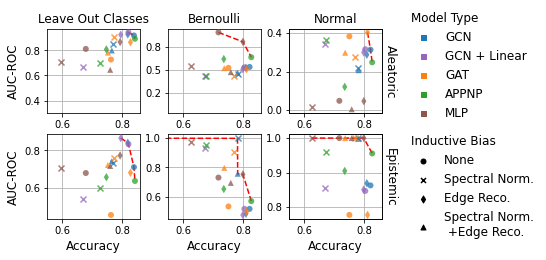

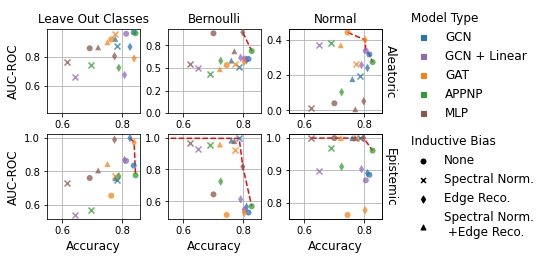

In [91]:
x_name = ACCURACY
y_name = METRIC
for setting in ((HYBRID, TRANSDUCTIVE)):
    fig, ax = pareto_plot(df_proxy[
        (df_proxy[NO_EDGES] == False) &
        (df_proxy[SETTING] == setting)
    ], x_name, y_name, xlim=(.55, .86))
    
    x_fn = x_name.replace(' ','-').replace('\n', '-')
    y_fn = y_name.replace(' ','-').replace('\n', '-')
    path = f'thesis_nbs/backbones_plots/pareto-{setting.lower()}-{x_fn}-{y_fn}.pdf'
    fig.savefig(path, bbox_inches='tight')
    print(path)
